## Load Data from CSVs

In [5]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

import unicodecsv

def ReadCSV(f):
    with open(f, 'rb') as fi:
        reader = unicodecsv.DictReader(fi)
        return list(reader)
    
daily_engagement = ReadCSV('daily_engagement.csv')
project_submissions = ReadCSV('project_submissions.csv')
enrollments = ReadCSV('enrollments.csv')

from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    date = str(date)
    if date == '' or date=='None' or date is None:
        return None
    else:
        #print date
        try:
            return dt.strptime(date, '%Y-%m-%d %H:%M:%S')
        except:
            return dt.strptime(date, '%Y-%m-%d')
            

# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '' or i=='None' or i is None:
        return None
    else:
        return int(float(i))
        

#print enrollments[4:5]
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

for s in project_submissions:
    s['completion_date']=parse_date(s['completion_date'])
    s['creation_date']=parse_date(s['creation_date'])

#print enrollments[0], '\n'
#print daily_engagement[0], '\n'
#print project_submissions[0], '\n'

## Problems in the Data

In [6]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for k in daily_engagement:
    k['account_key']=k.pop('acct')

print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def Describe(d):
    print 'Number of rows:', len(d)
    print 'Number of IDs:', len(set([k['account_key'] for k in d]))
    return ''
    
print 'Enrolment: \n' , Describe(enrollments)
print 'daily_engagement:\n', Describe(daily_engagement)
print 'project_submissions:\n', Describe(project_submissions)


Enrolment: 
Number of rows: 1640
Number of IDs: 1302

daily_engagement:
Number of rows: 136240
Number of IDs: 1237

project_submissions:
Number of rows: 3642
Number of IDs: 743



## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

n=0
l=set([k['account_key'] for k in daily_engagement])

for k in enrollments:
    if k['account_key'] not in l:
        print k
        n+=1
        if n>5:
            break


{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 1

## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

n=0
l=set([k['account_key'] for k in daily_engagement])
for k in enrollments:
    if k['account_key'] not in l and k['join_date']<>k['cancel_date']:
        print k
        n+=1

print n

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


In [10]:
# Count Udacity test accounts from all three tables

testAccounts = set([k['account_key'] for k in enrollments if k['is_udacity']==True])

print 'TestAccounts:', testAccounts

def CheckTestAccounts(table):
    c=1
    for k in table:
        if k['account_key'] in testAccounts:
            c+=1
    return c

print 'Enrollments. # of records with test accounts:', CheckTestAccounts(enrollments)
print 'Daily_engagement. # of records with test accounts:', CheckTestAccounts(daily_engagement)
print 'Project_submissions. # of records with test accounts:', CheckTestAccounts(project_submissions)

TestAccounts: set([u'1304', u'1069', u'448', u'312', u'818', u'1101'])
Enrollments. # of records with test accounts: 19
Daily_engagement. # of records with test accounts: 585
Project_submissions. # of records with test accounts: 9


In [11]:
# Delete Udacity test accounts from all three tables
print testAccounts 

def GetRidOfTestAccounts(table):
    res=[]
    res = [k for k in table if k['account_key'] not in testAccounts]
    return res 

print 
print 'Enrolment: \n' , Describe(enrollments)
print 'daily_engagement:\n', Describe(daily_engagement)
print 'project_submissions:\n', Describe(project_submissions)

#wta - without test accounts
enrollments_wta=GetRidOfTestAccounts(enrollments)
daily_engagement_wta=GetRidOfTestAccounts(daily_engagement)
project_submissions_wta=GetRidOfTestAccounts(project_submissions)

print 
print 'enrollments_wta: \n' , Describe(enrollments_wta)
print 'daily_engagement_wta:\n', Describe(daily_engagement_wta)
print 'project_submissions_wta:\n', Describe(project_submissions_wta)



set([u'1304', u'1069', u'448', u'312', u'818', u'1101'])

Enrolment: 
Number of rows: 1640
Number of IDs: 1302

daily_engagement:
Number of rows: 136240
Number of IDs: 1237

project_submissions:
Number of rows: 3642
Number of IDs: 743


enrollments_wta: 
Number of rows: 1622
Number of IDs: 1296

daily_engagement_wta:
Number of rows: 135656
Number of IDs: 1234

project_submissions_wta:
Number of rows: 3634
Number of IDs: 741



## Refining the Question

In [12]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.


paid_students = {}

#print enrollments_wta[0]

for k in enrollments_wta:
    if not k['is_canceled'] or k['days_to_cancel']>7:
        paid_students[k['account_key']]=k['join_date']

print len(paid_students)

995


In [13]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def SelectPaidStudents(t):
    table=[]
    for k in t:
        if k['account_key'] in paid_students.keys():
            table.append(k)
    return table

engagement_ps=SelectPaidStudents(daily_engagement_wta)
enrollments_ps=SelectPaidStudents(enrollments_wta)
project_submissions_ps=SelectPaidStudents(project_submissions_wta)

print len(enrollments_ps),len(engagement_ps) ,len(project_submissions_ps)

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0


paid_engagement_in_first_week = []

for e in engagement_ps:
    account_key = e['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = e['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(e)

len(paid_engagement_in_first_week)



1293 134549 3618


6920

In [14]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)



Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645


## Lessons Completed in First Week

In [15]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

print paid_engagement_in_first_week[0]

from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_courses_d = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_courses = 0
    for engagement_record in engagement_for_student:
        total_courses += engagement_record['lessons_completed']
    total_courses_d[account_key] = total_courses
    
import numpy as np

# Summarize the data about minutes spent in the classroom
total= total_courses_d.values()
print 'Mean:', np.mean(total)
print 'Standard deviation:', np.std(total)
print 'Minimum:', np.min(total)
print 'Maximum:', np.max(total)



{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
Mean: 1.63216080402
Standard deviation: 3.00140182563
Minimum: 0
Maximum: 36


In [16]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

#print paid_engagement_in_first_week[0:3]

from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    if engagement_record['num_courses_visited']>0:
        engagement_record['day_active']=1
    else:
        engagement_record['day_active']=0
    engagement_by_account[account_key].append(engagement_record)

# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_list = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total = 0
    for engagement_record in engagement_for_student:
        total += engagement_record['day_active']
    total_list[account_key] = total
    
import numpy as np

# Summarize the data about minutes spent in the classroom
#print total_list

total= total_list.values()
print 'Mean:', np.mean(total)
print 'Standard deviation:', np.std(total)
print 'Minimum:', np.min(total)
print 'Maximum:', np.max(total)



Mean: 2.91256281407
Standard deviation: 2.22037005491
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [17]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

successful = set([x['account_key'] for x in project_submissions_wta if x['assigned_rating'] in ('PASSED','DISTINCTION' ) and x['lesson_key'] in subway_project_lesson_keys])

paid_engagement_in_first_week[0:1]

studentList = [x['account_key']for x in  paid_engagement_in_first_week]

passing_engagement=0
non_passing_engagement=0

for x in studentList:
    if x in successful:
        passing_engagement+=1
    else:
        non_passing_engagement+=1

print 'passing_engagement =', passing_engagement
print 'non_passing_engagement =', non_passing_engagement

passing_engagement = 4528
non_passing_engagement = 2392


In [18]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

data = [1, 2, 1, 3, 3, 1, 4, 2]

import matplotlib.pyplot as plt
plt.hist(data)

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

Populating the interactive namespace from numpy and matplotlib


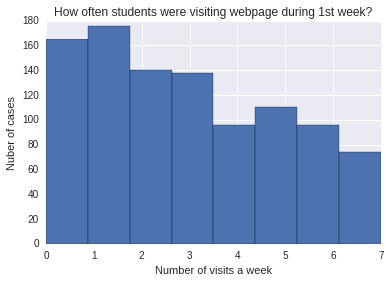

In [30]:
#number of days worked
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline
plt.hist(total_list.values(), bins=8)

plt.xlabel("Number of visits a week")
plt.ylabel('Nuber of cases')
plt.title('How often students were visiting webpage during 1st week?')
